In [787]:
import os  # For file and directory handling
import pandas as pd  # For data manipulation and analysis
import json  # For file handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced data visualizations

In [855]:
# COMBINING STREAMING HISTORY FILES INTO ONE BIG ONE

# Set the folder where your Spotify data is
folder_path = '/Users/hafsahsiddiqui/Downloads/spotify account data/'

# List all the files
file_names = ['streaminghistory_music_0.json', 'streaminghistory_music_1.json', 'streaminghistory_music_2.json','streaminghistory_music_3.json']

# Load each file and append to a list
dfs = []
for file in file_names:
    path = folder_path + file
    try:
        df = pd.read_json(path)
        dfs.append(df)
        print(f"✅ Loaded {file} with {len(df)} rows.")
    except Exception as e:
        print(f"❌ Error loading {file}: {e}") # Print error if loading fails

# Combine all DataFrames into a single one
combined_streaming_history = pd.concat(dfs, ignore_index=True)

# Display the shape of the final combined DataFrame
print("🎉 Combined Data Shape:", combined_streaming_history.shape)

✅ Loaded streaminghistory_music_0.json with 10000 rows.
✅ Loaded streaminghistory_music_1.json with 10000 rows.
✅ Loaded streaminghistory_music_2.json with 10000 rows.
✅ Loaded streaminghistory_music_3.json with 9532 rows.
🎉 Combined Data Shape: (39532, 4)


In [791]:
print(combined_streaming_history.columns) #print all the columns in the combined data

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')


In [793]:
print(combined_streaming_history.head()) # Display the first 5 rows of the data

            endTime        artistName  \
0  2024-05-15 00:45       Nicki Minaj   
1  2024-05-15 00:48      Simple Minds   
2  2024-05-15 00:51   Rowan Blanchard   
3  2024-05-15 00:52  Phillip Phillips   
4  2024-05-15 00:54      Simple Minds   

                                           trackName  msPlayed  
0                           The Night Is Still Young      8555  
1                        Don't You (Forget About Me)    171168  
2  Take On the World - Theme Song From "Girl Meet...    150448  
3                                   Gone, Gone, Gone     53760  
4                        Don't You (Forget About Me)    108591  


In [797]:
print("Earliest date:", combined_streaming_history['endTime'].min())
print("Latest date:", combined_streaming_history['endTime'].max())

Earliest date: 2024-05-15 00:45
Latest date: 2025-05-15 23:49


In [799]:
# Convert 'endTime' to datetime 
combined_streaming_history['endTime'] = pd.to_datetime(combined_streaming_history['endTime'])

# Extract year from 'endTime'
combined_streaming_history['year'] = combined_streaming_history['endTime'].dt.year

# Find the first time you streamed each artist
artist_first_stream_year = combined_streaming_history.groupby('artistName')['year'].min().reset_index()
artist_first_stream_year.columns = ['artistName', 'first_stream_year']

# Artists whose first stream was in 2025 (approximate "library additions" for 2025)
new_artists_2025 = artist_first_stream_year[artist_first_stream_year['first_stream_year'] == 2025]

# All artists you streamed in 2025 (whether new or old)
artists_streamed_2025 = combined_streaming_history[combined_streaming_history['year'] == 2025]['artistName'].unique()

# Calculate percentage of 2025 streamed artists who were new (first streamed in 2025)
percent_new_artists_2025 = (len(new_artists_2025) / len(artists_streamed_2025)) * 100

print(f"Approximately {percent_new_artists_2025:.2f}% of your artists streamed in 2025 are new (first time streamed in 2025).")

Approximately 31.03% of your artists streamed in 2025 are new (first time streamed in 2025).


In [697]:
# TOTAL LISTENING TIME (IN HOURS)

# Convert the 'endTime' column to datetime format to analyze by date/time
combined_streaming_history['endTime'] = pd.to_datetime(combined_streaming_history['endTime'])
# Ensure the 'msPlayed' column is in integer format for accurate calculations
combined_streaming_history['msPlayed'] = combined_streaming_history['msPlayed'].astype(int)

# Calculate total listening time in hours
# msPlayed is in milliseconds, so we divide by (1000 * 60 * 60) to convert to hours
total_listening_hours = combined_streaming_history['msPlayed'].sum() / (1000 * 60 * 60)

# Print the result with 2 decimal places
print(f"Total listening time (hours): {total_listening_hours:.2f}")

Total listening time (hours): 934.47


In [699]:
# TOP 10 MOST-LISTENED TO ARTIST BY TOTAL MILLISECONDS PLAYED

# Group the data by 'artistName', then sum the 'msPlayed' values for each artist
# This gives the total listening time per artist in milliseconds
top_artists = combined_streaming_history.groupby('artistName')['msPlayed'].sum()

# Sort the artists by total listening time in descending order (most listened first)
top_artists = top_artists.sort_values(ascending=False)

# Select the top 10 artists with the highest total listening time
top_artists = top_artists.head(10)

# Print the result: top 10 most listened-to artists by total milliseconds played
print(top_artists)

artistName
Pritam                191137805
Vishal-Shekhar        123462415
Taylor Swift          100964724
Shankar-Ehsaan-Loy     78451179
Jatin-Lalit            72573954
Lana Del Rey           67666716
Atif Aslam             63201798
Sonu Nigam             53721959
Sabrina Carpenter      45207650
A.R. Rahman            44224372
Name: msPlayed, dtype: int64


In [807]:
# TOP 10 MOST-LISTENED TO ARTIST BY NUMBER OF PLAYS

# Filter out plays shorter than 30 seconds (30,000 milliseconds)
filtered_df = combined_streaming_history[combined_streaming_history['msPlayed'] >= 30000]

# Then count plays per artist
artist_play_counts = filtered_df.groupby('artistName').size()
# Sort by number of plays (descending)
top_artists_by_plays = artist_play_counts.sort_values(ascending=False).head(10)

print("Top 10 Artists by Number of Meaningful Plays (>=30s):\n")
print(top_artists_by_plays)

Top 10 Artists by Number of Meaningful Plays (>=30s):

artistName
Pritam                1145
Vishal-Shekhar         782
Taylor Swift           634
Lana Del Rey           463
Shankar-Ehsaan-Loy     460
Jatin-Lalit            421
Atif Aslam             363
Sabrina Carpenter      335
Sonu Nigam             321
One Direction          269
dtype: int64


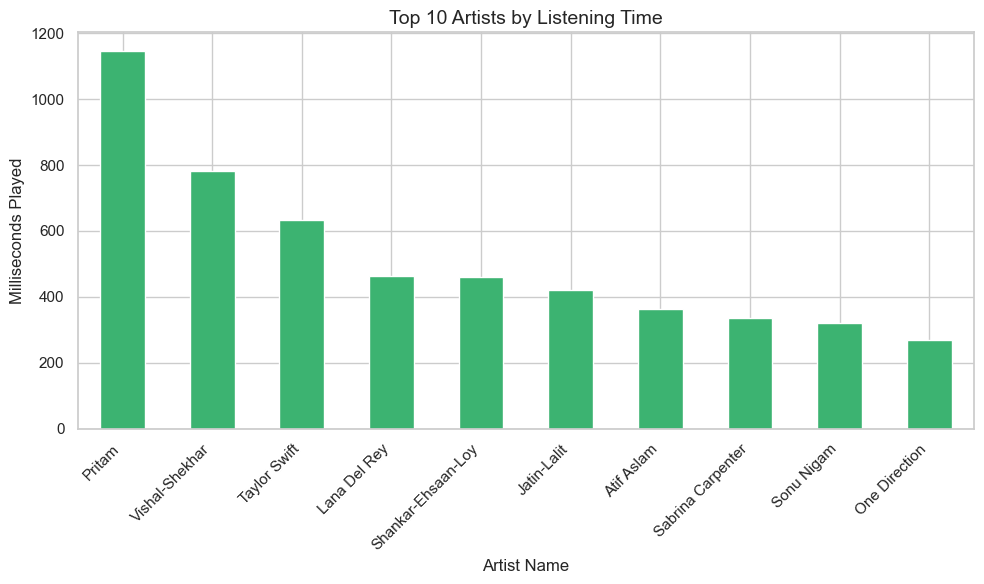

In [809]:
# Plot a bar chart of the top 10 artists by total listening time
top_artists_by_plays.plot(kind='bar', figsize=(10, 6), color='mediumseagreen')

# Add chart title and axis labels
plt.title('Top 10 Artists by Listening Time', fontsize=14)
plt.ylabel('Milliseconds Played')
plt.xlabel('Artist Name')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

In [817]:
#TOP 10 SONGS by # of plays

# Filter out plays shorter than 30 seconds (30,000 milliseconds)
filtered_df = combined_streaming_history[combined_streaming_history['msPlayed'] >= 30000]

# Then count plays per song
song_play_counts = filtered_df.groupby('trackName').size()
top_songs_by_plays = song_play_counts.sort_values(ascending=False).head(10)

print("Top 10 Songs by Number of Meaningful Plays (>=30s):\n")
print(top_songs_by_plays)

Top 10 Songs by Number of Meaningful Plays (>=30s):

trackName
Espresso                                    131
Koi Mil Gaya                                109
Soldier, Poet, King                         106
Mitwa                                       100
Ladki Badi Anjani Hai                        98
Whistle Baja                                 98
cardigan                                     91
You Are the Music in Me                      91
Maula Mere Maula                             90
Just Give Me a Reason (feat. Nate Ruess)     87
dtype: int64


In [827]:
# Filter out plays shorter than 30 seconds (30,000 milliseconds)
filtered_df = combined_streaming_history[combined_streaming_history['msPlayed'] >= 30000]

# Count plays per artist
artist_play_counts = filtered_df.groupby('artistName').size()

# Sort artists by number of plays (descending)
top_artists_by_plays = artist_play_counts.sort_values(ascending=False)

# Defined all the Bollywood artists to filter out
indian_artists = [
    'Arijit Singh',
    'Shreya Ghoshal',
    'Pritam',
    'Neha Kakkar',
    'Armaan Malik',
    'Badshah',
    'A.R. Rahman',
    'Atif Aslam',
    'Vishal-Shekhar',
    'Jatin-Lalit',
    'Shankar-Ehsaan-Loy',
    'Sonu Nigam',
    'A.R. Rahman'
]

# Filter out Indian artists from the top artists list
non_indian_artists = top_artists_by_plays[~top_artists_by_plays.index.isin(indian_artists)]

# Select the top 10 non-Indian artists (likely English-language)
top_english_artists = non_indian_artists.head(10)

#Display the result
print(top_english_artists)

artistName
Taylor Swift         634
Lana Del Rey         463
Sabrina Carpenter    335
One Direction        269
Ariana Grande        260
Hozier               258
Rihanna              242
Chappell Roan        229
Lorde                227
Salim–Sulaiman       224
dtype: int64


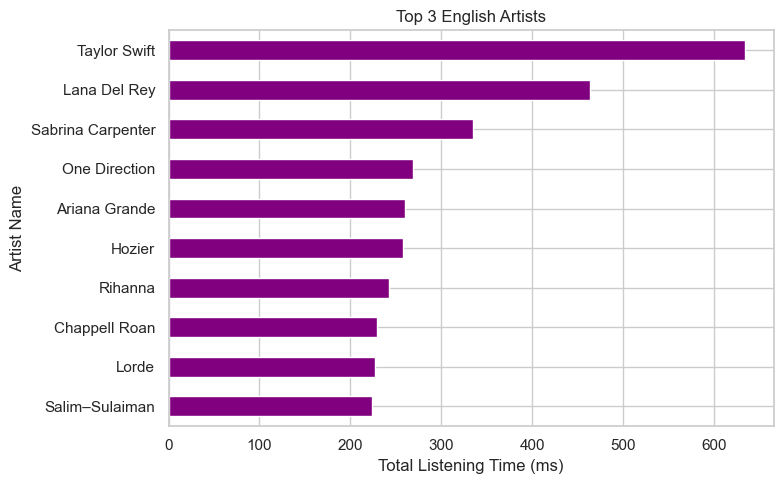

In [829]:
# Plot a horizontal bar chart of the top 3 English-speaking artists
top_english_artists.plot(kind='barh', title='Top 3 English Artists', figsize=(8,5), color='purple')
plt.xlabel('Total Listening Time (ms)')
plt.ylabel('Artist Name')
plt.gca().invert_yaxis()  # # Invert the y-axis so the most listened-to artist appears at the top
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

In [835]:
# Convert the 'endTime' column to datetime format so we can work with dates and times
combined_streaming_history['endTime'] = pd.to_datetime(all_data['endTime'])

# Extract the hour of the day when each track was played (0 to 23)
combined_streaming_history['hour'] = combined_streaming_history['endTime'].dt.hour

# Extract the day of the week (e.g., Monday, Tuesday) from the timestamp
combined_streaming_history['day_of_week'] = combined_streaming_history['endTime'].dt.day_name()

In [837]:
# Example: Count listens by hour
listens_by_hour = combined_streaming_history.groupby('hour').size()
print(listens_by_hour)

hour
0     1802
1     1652
2     2017
3     2558
4     2822
5     2269
6     1782
7      672
8      324
9       51
10       8
11      53
12      33
13     108
14     558
15    1107
16    2773
17    3608
18    3011
19    2910
20    2708
21    2470
22    2145
23    2091
dtype: int64


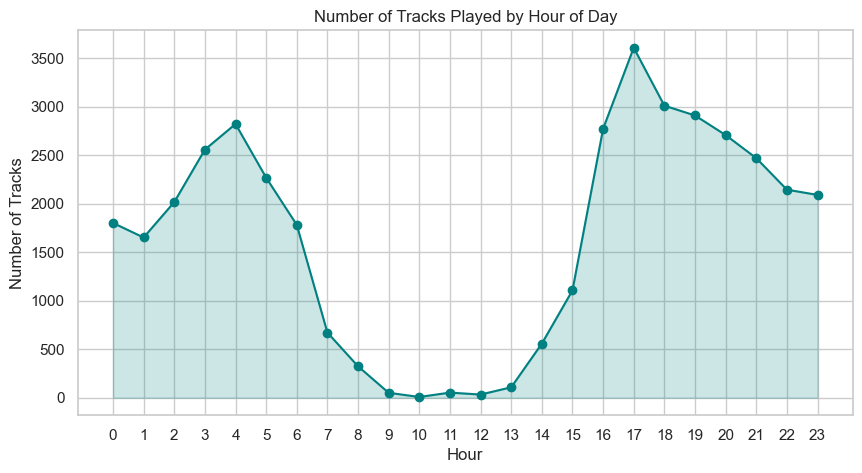

In [539]:
plt.figure(figsize=(10, 5))
listens_by_hour.plot(kind='line', marker='o', color='teal')
plt.fill_between(listens_by_hour.index, listens_by_hour.values, alpha=0.2, color='teal')
plt.title('Number of Tracks Played by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [541]:
# Example: Count listens by day of week
listens_by_day = combined_streaming_history.groupby('day_of_week').size()
print(listens_by_day)

day_of_week
Friday       5883
Monday       5987
Saturday     5312
Sunday       4942
Thursday     6302
Tuesday      5353
Wednesday    5753
dtype: int64


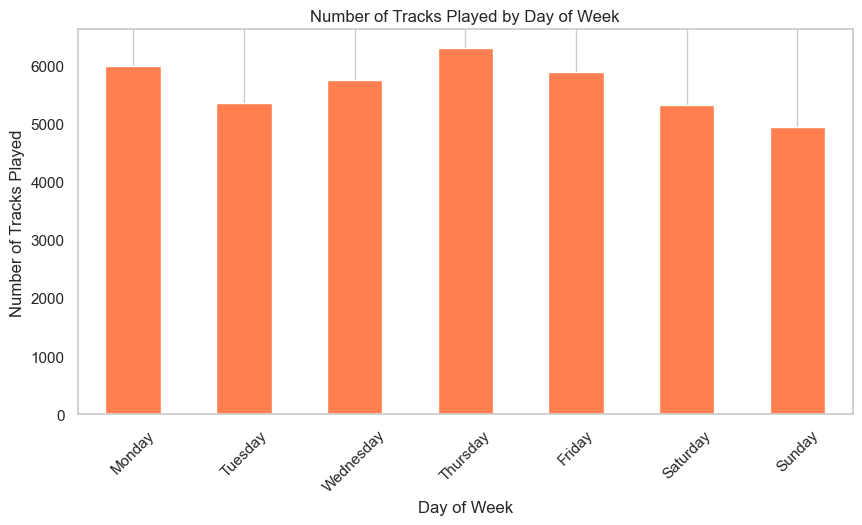

In [639]:
# Plot listens by day of week
plt.figure(figsize=(10, 5))
listens_by_day.plot(kind='bar', color='coral')
plt.title('Number of Tracks Played by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Tracks Played')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [659]:
# Extract the month name (e.g., January, February) from the timestamp
combined_streaming_history['month'] = combined_streaming_history['endTime'].dt.month_name()

# Define the correct order of months for plotting or display
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Group the data by month and count the number of listens per month
listens_by_month = combined_streaming_history.groupby('month').size()

# Reindex the grouped data to ensure months appear in calendar order
listens_by_month = listens_by_month.reindex(months_order)

print(listens_by_month)

month
January      2383
February     3722
March        1704
April        2487
May          4369
June         4114
July         4227
August       3929
September    3173
October      3111
November     3455
December     2858
dtype: int64


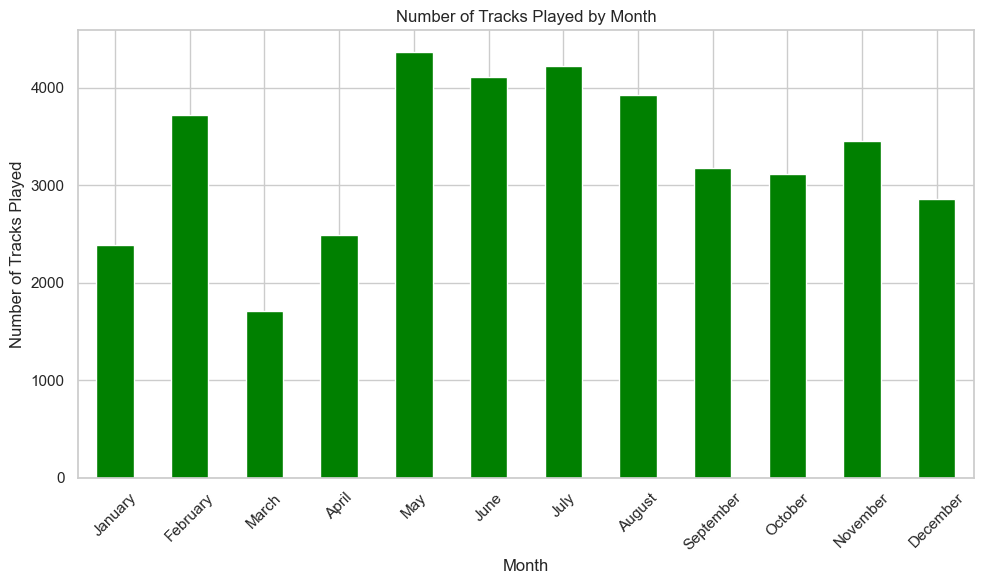

In [661]:
# Plot listens by month as a bar chart
listens_by_month.plot(kind='bar', color='green', figsize=(10,6))

plt.title('Number of Tracks Played by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [663]:
# Function to assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply function
combined_streaming_history['season'] = combined_streaming_history['endTime'].dt.month.apply(get_season)

# Count listens by season
listens_by_season = combined_streaming_history['season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
print(listens_by_season)

season
Winter     8963
Spring     8560
Summer    12270
Autumn     9739
Name: count, dtype: int64


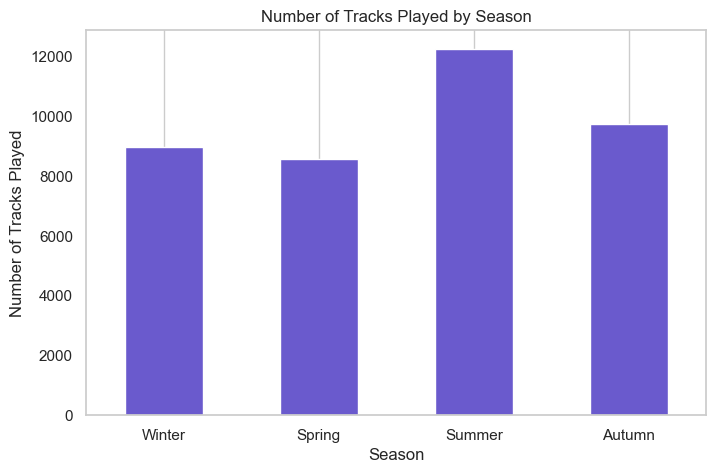

In [665]:
# Plot
plt.figure(figsize=(8, 5))
listens_by_season.plot(kind='bar', color='slateblue')
plt.title('Number of Tracks Played by Season')
plt.xlabel('Season')
plt.ylabel('Number of Tracks Played')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [851]:
# Flag as skip if less than 30 seconds (30,000 ms)
combined_streaming_history['is_skip'] = combined_streaming_history['msPlayed'] < 30000

skipped_songs = (
    combined_streaming_history[combined_streaming_history['is_skip']]
    .groupby(['trackName', 'artistName'])
    .size()
    .sort_values(ascending=False)
    .head(10)
)

print("🎵 Most Skipped Songs:")
print(skipped_songs)

🎵 Most Skipped Songs:
trackName              artistName       
The Avengers           Alan Silvestri       89
Shukran Allah          Salim–Sulaiman       71
Espresso               Sabrina Carpenter    54
Ladki Badi Anjani Hai  Jatin-Lalit          51
Don't Dream It's Over  Crowded House        49
Who Let The Dogs Out   Baha Men             49
BIRDS OF A FEATHER     Billie Eilish        46
Masha-Allah            Monty Sharma         45
Lat Lag Gayee          Benny Dayal          45
Tum Hi Ho Bandhu       Neeraj Shridhar      45
dtype: int64


In [715]:
# Updated the path
search_data = pd.read_json('/Users/hafsahsiddiqui/Downloads/spotify account data/SearchQueries.json')

print(search_data.columns)

Index(['platform', 'searchTime', 'searchQuery', 'searchInteractionURIs'], dtype='object')


In [717]:
print(search_data.head())

  platform                     searchTime searchQuery searchInteractionURIs
0           2025-02-16T00:04:49.616Z[UTC]          fi                    []
1           2025-02-16T00:04:49.635Z[UTC]         fin                    []
2           2025-02-16T00:04:49.686Z[UTC]          fi                    []
3           2025-02-16T00:04:49.696Z[UTC]         fin                    []
4           2025-02-16T00:04:51.891Z[UTC]         fuc                    []


In [705]:
# Clean data: make all queries lowercase and strip whitespace
search_data['searchQuery'] = search_data['searchQuery'].str.lower().str.strip()

# Count top queries
top_queries = search_data['searchQuery'].value_counts().head(10)

print("🔎 Top Search Queries:")
print(top_queries)

🔎 Top Search Queries:
searchQuery
t           31
a           28
i           23
b           19
spring      19
f           18
m           18
timothee    17
r           16
indie       15
Name: count, dtype: int64


In [723]:
# Updated the path
playlist_data = pd.read_json('/Users/hafsahsiddiqui/Downloads/spotify account data/playlist1.json')

# The 'playlists' column contained dictionaries, so expanded them into a new DataFrame
playlists_expanded = pd.json_normalize(playlist_data['playlists'])

print(playlists_expanded.columns)

Index(['name', 'lastModifiedDate', 'items', 'description',
       'numberOfFollowers'],
      dtype='object')


In [725]:
print(playlists_expanded.head())

         name lastModifiedDate  \
0   currently       2025-05-02   
1  forever 🤞🏽       2024-07-31   
2      ariana       2025-03-29   
3      billie       2025-04-19   
4      olivia       2025-02-05   

                                               items  \
0  [{'track': {'trackName': 'Soldier, Poet, King'...   
1  [{'track': {'trackName': 'Girl', 'artistName':...   
2  [{'track': {'trackName': 'intro (end of the wo...   
3  [{'track': {'trackName': 'What Was I Made For?...   
4  [{'track': {'trackName': 'Out of the Old - Fro...   

                                         description  numberOfFollowers  
0  bops that I found or bops that came across my ...                  0  
1                                               None                  0  
2                                               None                  0  
3                                               None                  0  
4                                               None                  0  


In [727]:
tracks_data = []  # List to store track details from all playlists

# Loop through each playlist in the expanded DataFrame
for _, row in playlists_expanded.iterrows():
    playlist_name = row['name']  # Get playlist name
    last_modified = row['lastModifiedDate']  # Get last modified date
    description = row.get('description', None)  # Get description (if available)
    
    # Loop through each item (track) in the playlist's 'items' list
    for item in row['items']:
        track = item.get('track')  # Extract the track dictionary
        
        # Only proceed if 'track' is not None to avoid errors
        if track:
            # Get track name and artist name, or use 'Unknown' if missing
            track_name = track.get('trackName', 'Unknown')
            artist_name = track.get('artistName', 'Unknown')

            # Append the extracted info as a dictionary to the list
            tracks_data.append({
                'Playlist': playlist_name,
                'Track Name': track_name,
                'Artist': artist_name,
                'Last Modified': last_modified,
                'Description': description
            })

# Convert the list of track dictionaries into a DataFrame for analysis
playlist_tracks_df = pd.DataFrame(tracks_data)

# Preview the first few rows of the resulting DataFrame
print(playlist_tracks_df.head())

    Playlist             Track Name                Artist Last Modified  \
0  currently    Soldier, Poet, King         The Oh Hellos    2025-05-02   
1  currently                 Nobody                Mitski    2025-05-02   
2  currently                     K.  Cigarettes After Sex    2025-05-02   
3  currently  I Love You, I'm Sorry         Gracie Abrams    2025-05-02   
4  currently   I Bet on Losing Dogs                Mitski    2025-05-02   

                                         Description  
0  bops that I found or bops that came across my ...  
1  bops that I found or bops that came across my ...  
2  bops that I found or bops that came across my ...  
3  bops that I found or bops that came across my ...  
4  bops that I found or bops that came across my ...  


In [577]:
# Count tracks per playlist
track_counts = playlist_tracks_df.groupby('Playlist').size().sort_values(ascending=False)

print(track_counts)

Playlist
throwback                                                 430
desi                                                      334
that's a rap                                              272
i wish i knew how to quit you                             255
before y2k                                                235
need to add to a playlist                                 218
magic happens here                                        197
but on a wednesday in a café, I watched it begin again    185
love songs                                                139
you should see me in a crown                              131
a coming of age film                                      125
a world alone                                             120
Shaadi                                                    118
better than revenge                                       100
desi bangers                                               95
Mehndi                                                     92

Artist
Taylor Swift      222
Olivia Rodrigo    130
Pritam            100
Justin Bieber      85
Ariana Grande      83
Lana Del Rey       73
Vishal-Shekhar     72
Billie Eilish      59
One Direction      59
Harry Styles       45
Name: count, dtype: int64


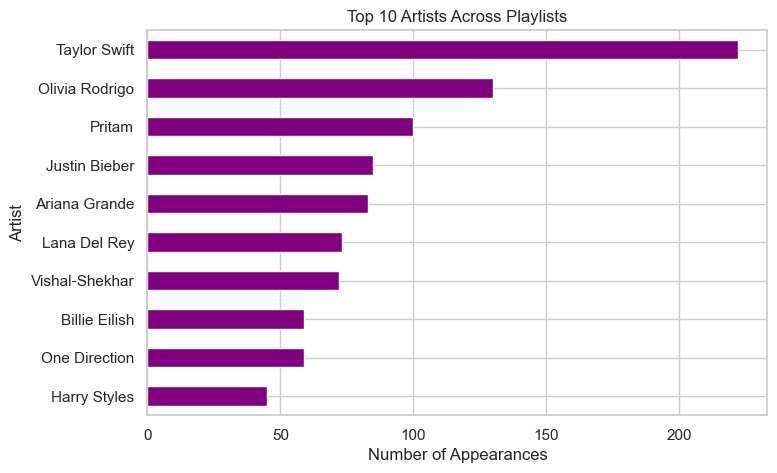

In [579]:
# Count appearances of each artist across all playlists
top_artists = playlist_tracks_df['Artist'].value_counts().head(10)

print(top_artists)

# Visualize top artists
top_artists.plot(kind='barh', figsize=(8,5), color='purple', title='Top 10 Artists Across Playlists')
plt.xlabel('Number of Appearances')
plt.gca().invert_yaxis()
plt.show()

Track Name
lacy                                                                            7
Can’t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes    6
Fix You                                                                         6
HOT TO GO!                                                                      6
all-american bitch                                                              6
Sorry                                                                           6
Stop Crying Your Heart Out                                                      5
Espresso                                                                        5
Doin' Time                                                                      5
Iris                                                                            5
Name: count, dtype: int64


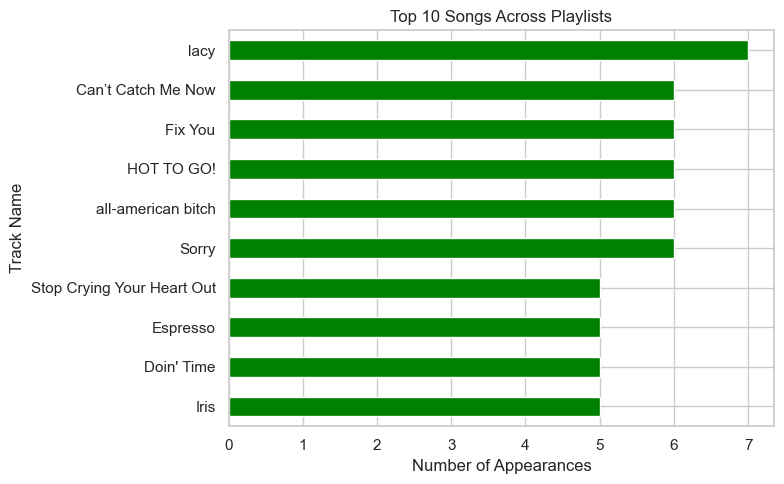

In [581]:
# Count how many times each song appears across playlists
top_songs = playlist_tracks_df['Track Name'].value_counts().head(10)

print(top_songs)


# Create a copy with a custom label for the long song
top_songs_for_plot = top_songs.rename(index={
    "Can’t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes": "Can’t Catch Me Now"
})

# Visualize top songs
plt.figure(figsize=(8, 5))
top_songs_for_plot.plot(kind='barh', color='green')
plt.title('Top 10 Songs Across Playlists')
plt.xlabel('Number of Appearances')
plt.gca().invert_yaxis()  # Most popular song at the top
plt.tight_layout()
plt.show()

In [805]:
# Make sure 'Last Modified' is datetime
playlist_tracks_df['Last Modified'] = pd.to_datetime(playlist_tracks_df['Last Modified'])

# Standardize track name column
playlist_tracks_df.rename(columns={'Track Name': 'trackName'}, inplace=True)

# Streaming history date conversion
combined_streaming_history['endTime'] = pd.to_datetime(combined_streaming_history['endTime'])

# 1. Get first stream date per track (proxy for library addition)
first_stream = combined_streaming_history.groupby('trackName')['endTime'].min().reset_index()
first_stream['first_stream_year'] = first_stream['endTime'].dt.year

# 2. Tracks first streamed in 2025
tracks_first_streamed_2025 = set(first_stream[first_stream['first_stream_year'] == 2025]['trackName'])

# 3. Tracks in playlists before 2025
tracks_in_playlists_before_2025 = set(
    playlist_tracks_df[playlist_tracks_df['Last Modified'].dt.year < 2025]['trackName'].unique()
)

# 4. Tracks first streamed in 2025 that were NOT in any playlist before 2025
tracks_2025_not_in_playlist_before = tracks_first_streamed_2025 - tracks_in_playlists_before_2025

# 5. Count the number of such tracks
count_new_tracks_2025 = len(tracks_2025_not_in_playlist_before)

print(f"Added {count_new_tracks_2025} new tracks in 2025 not previously in any playlists.")

Added 1004 new tracks in 2025 not previously in any playlists.


In [757]:
from pandas import json_normalize

# Load the JSON file with Python's json module
with open('/Users/hafsahsiddiqui/Downloads/spotify account data/yourlibrary.json') as f:
    library_data = json.load(f)

# 'albums' is a list of dicts inside your library JSON, extract it
albums = library_data['albums']

# Flatten the list of album dicts into a DataFrame
albums_df = json_normalize(albums)

print(albums_df.head())
print(albums_df.columns)

                                              artist  \
0                                      Gracie Abrams   
1                                       Lana Del Rey   
2  Cast of High School Musical: The Musical: The ...   
3                                           Maroon 5   
4                                         Charli xcx   

                                               album  \
0                                      Good Riddance   
1                   Chemtrails Over The Country Club   
2       High School Musical: The Musical: The Series   
3                                   Songs About Jane   
4  Brat and it’s the same but there’s three more ...   

                                    uri  
0  spotify:album:78YYcghEDz2dHRx0EcDGXZ  
1  spotify:album:6QeosPQpJckkW0Obir5RT8  
2  spotify:album:4GgojLZOPRu8MdUVmjNRSI  
3  spotify:album:1Rv9WRKyYhFaGbuYDaQunN  
4  spotify:album:316O0Xetgx2NJLRgJBw4uq  
Index(['artist', 'album', 'uri'], dtype='object')
RangeIndex(start=0, stop

In [841]:
# Normalize and list followed artists
artists_df = json_normalize(library_data['artists'])

print("\n🎤 Followed Artists:")
for i, row in artists_df.iterrows():
    print(f"{i+1}. {row['name']}")

print(f"\n📊 Total followed artists: {len(artists_df)}")


🎤 Followed Artists:
1. Ariana Grande
2. Billie Eilish
3. Chappell Roan
4. Cigarettes After Sex
5. Ethel Cain
6. Fleetwood Mac
7. Hozier
8. Lana Del Rey
9. Laufey
10. Lorde
11. Mitski
12. Olivia Rodrigo
13. Phoebe Bridgers
14. Sabrina Carpenter
15. Tate McRae
16. Taylor Swift
17. The Marías
18. The Smiths

📊 Total followed artists: 18


In [749]:
# NUMBER OF SAVED ALBUMS

print("\n💽 Saved Albums:")
for i, row in albums_df.iterrows():
    print(f"{i+1}. {row['album']} by {row['artist']}")

print(f"\n📊 Total saved albums: {len(albums_df)}")


💽 Saved Albums:
1. Good Riddance by Gracie Abrams
2. Chemtrails Over The Country Club by Lana Del Rey
3. High School Musical: The Musical: The Series by Cast of High School Musical: The Musical: The Series
4. Songs About Jane by Maroon 5
5. Brat and it’s the same but there’s three more songs so it’s not by Charli xcx
6. emails i can’t send fwd: by Sabrina Carpenter
7. MAGDALENE by FKA twigs
8. Manic by Halsey
9. The Secret of Us by Gracie Abrams
10. COWBOY CARTER by Beyoncé
11. Future Nostalgia by Dua Lipa
12. The Greatest Showman (Original Motion Picture Soundtrack) by Various Artists
13. Melodrama by Lorde
14. x by Ed Sheeran
15. Pure Heroine by Lorde
16. Everything I Know About Love by Laufey
17. After Hours by The Weeknd
18. 21 by Adele
19. Bridgerton (Covers from the Netflix Original Series) by Vitamin String Quartet
20. Fearless (Taylor's Version) by Taylor Swift
21. Wicked: The Soundtrack by Wicked Movie Cast
22. Cry Baby by Melanie Martinez
23. eternal sunshine deluxe: brighte

In [731]:
print(albums_df['artist'].value_counts().head(10))  # Top 10 artists by album count

artist
Taylor Swift         17
Gracie Abrams         7
Ariana Grande         6
Ed Sheeran            6
Bruno Mars            5
Lorde                 5
Sabrina Carpenter     5
SZA                   4
Olivia Rodrigo        4
Laufey                4
Name: count, dtype: int64


artist
Taylor Swift         17
Gracie Abrams         7
Ariana Grande         6
Ed Sheeran            6
Bruno Mars            5
Lorde                 5
Sabrina Carpenter     5
SZA                   4
Olivia Rodrigo        4
Laufey                4
Name: count, dtype: int64


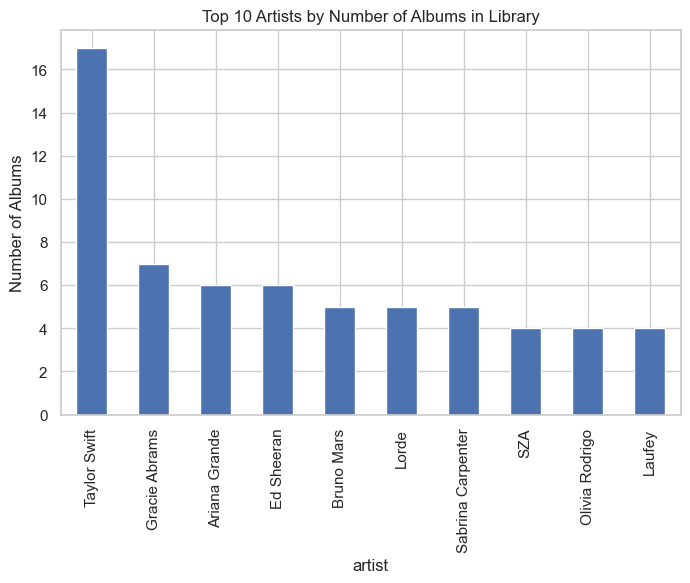

In [603]:
top_artists = albums_df['artist'].value_counts().head(10)
print(top_artists)

top_artists.plot(kind='bar', figsize=(8,5), title='Top 10 Artists by Number of Albums in Library')
plt.ylabel('Number of Albums')
plt.show()

album
Midnights                                  3
Good Riddance                              2
Melodrama                                  2
1989 (Taylor's Version)                    2
GUTS (spilled)                             2
An Evening With Silk Sonic                 2
Pure Heroine                               2
Divinely Uninspired To A Hellish Extent    2
Positions                                  2
The Secret of Us                           2
Name: count, dtype: int64


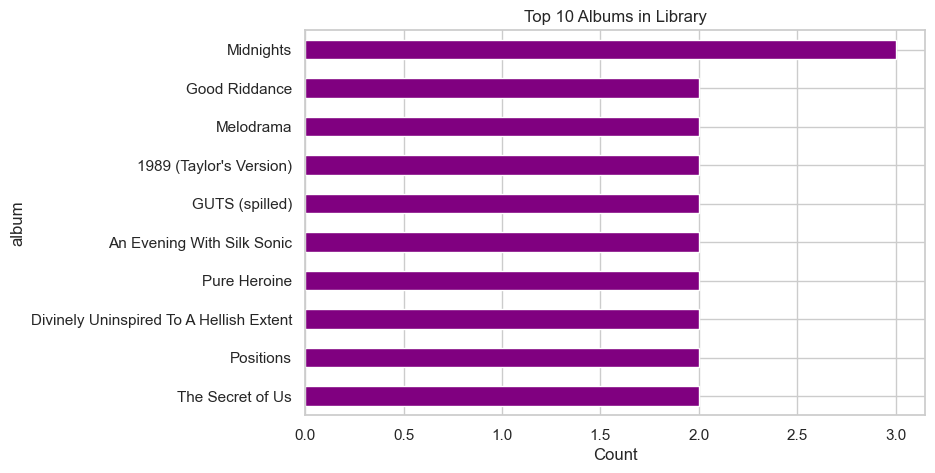

In [611]:
# Albums with most count
top_albums = albums_df['album'].value_counts().head(10)
print(top_albums)

top_albums.plot(kind='barh', figsize=(8,5), color='purple', title='Top 10 Albums in Library')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

In [607]:
print("Total unique artists:", albums_df['artist'].nunique())
print("Total unique albums:", albums_df['album'].nunique())

Total unique artists: 72
Total unique albums: 138
